In [1]:
import pandas as pd
import numpy as np
from analysis_utils import *


In [2]:
PAREDAO = "paredao3"
CAND1_PATH = "data/paredao3/prior.csv"
CAND2_PATH = "data/paredao3/hadson.csv"


In [3]:
candidate1_df = pd.read_csv(CAND1_PATH)
candidate2_df = pd.read_csv(CAND2_PATH)

In [4]:
cand1 = candidate1_df[["tweet", "sentiment", "date", "likes_count", "retweets_count"]]
cand2 = candidate2_df[["tweet", "sentiment", "date", "likes_count", "retweets_count"]]

# Felipe Prior

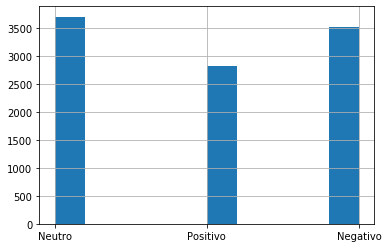

In [5]:
cand1["sentiment"].hist()

In [6]:
cand1

,tweet,sentiment,date,likes_count,retweets_count
0,chama na DM,Neutro,2020-02-11,2,0
1,Prior apaixonado,Neutro,2020-02-11,1,0
2,tô votando sem parar. cê pode olhar a dm coisa...,Positivo,2020-02-11,0,0
3,Adoro o Felipe e torço para ele ficar.😍,Positivo,2020-02-11,0,0
4,Ele é demais! Kkkkkkkk\n\n@felipeprior https:...,Positivo,2020-02-11,1,0
...,...,...,...,...,...
10040,Com hadson ficando a fan base de hetero dele s...,Negativo,2020-02-09,1,0
10041,impossível odiar o prior dessa forma! colabore...,Positivo,2020-02-09,0,0
10042,Preferia que o Lucas saísse antes do Hadson e ...,Negativo,2020-02-09,3,0
10043,"Enquete Uol:\n\nHadson: 64,81\nPrior: 35,19 #B...",Neutro,2020-02-09,1,0


# Hadson (Eliminado)

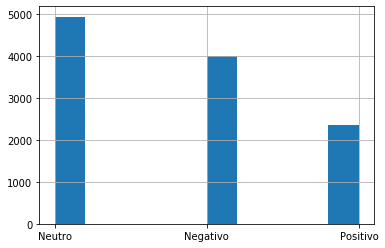

In [7]:
cand2["sentiment"].hist()

In [8]:
cand2

,tweet,sentiment,date,likes_count,retweets_count
0,QUEM SAI NESSE PAREDÃO ? @felipeprior ou @Had...,Neutro,2020-02-09,0,0
1,Hoje o #BBB20 morre de vez com a eliminação do...,Negativo,2020-02-11,2,0
2,Votei na Opção 'Hadson' em 'Paredão BBB20: Que...,Positivo,2020-02-11,0,0
3,hj é dia de eliminar o Hadson galera #BBB20,Neutro,2020-02-11,2,0
4,EMBUSTE Votei na Opção 'Hadson' em 'Paredão BB...,Neutro,2020-02-11,1,0
...,...,...,...,...,...
11254,"Hadson ""eu não sou capaz de manipular nem meus...",Neutro,2020-02-09,3,0
11255,Meu problema com o Hadson (fora ele ser bolsom...,Negativo,2020-02-09,13,1
11256,não tem condição o hadson ser tão burro assim ...,Negativo,2020-02-09,1,0
11257,Alguém consegue nos dizer se é o Dybala ou o H...,Neutro,2020-02-09,0,0


# Quantidades absolutas

In [9]:
candidates = {"felipe_prior": cand1, "hadson": cand2}

In [10]:
qtds_df = get_raw_quantities(candidates)

In [11]:
qtds_df

,positivos,neutros,negativos
nome,,,
felipe_prior,2824,3707,3514
hadson,2344,4928,3987


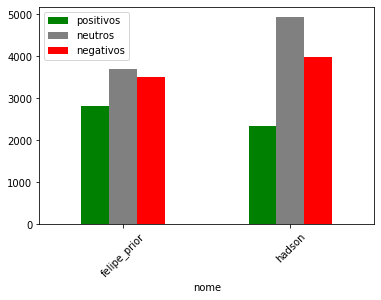

In [12]:
qtds_df.plot.bar(rot=45, color=['green', 'gray', 'red'])

# Porcentagens em relação aos total de tweets de cada candidato

In [13]:
pcts_df = get_pct_by_candidate(candidates)

In [14]:
pcts_df

,positivos,neutros,negativos
nome,,,
felipe_prior,0.281135,0.369039,0.349826
hadson,0.208189,0.437694,0.354117


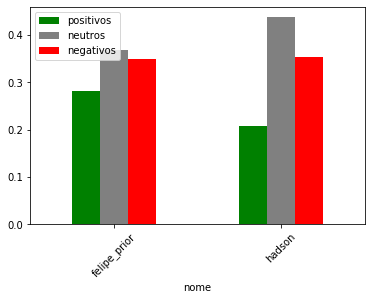

In [15]:
pcts_df.plot.bar(rot=45, color=['green', 'gray', 'red'])

# Porcentagens em relação ao total de tweets por categoria

In [16]:
qtds_df_copy = qtds_df.copy()

In [17]:
qtds_df["positivos"] /= qtds_df["positivos"].sum() 
qtds_df["neutros"] /= qtds_df["neutros"].sum()
qtds_df["negativos"] /= qtds_df["negativos"].sum()

In [18]:
qtds_df

,positivos,neutros,negativos
nome,,,
felipe_prior,0.54644,0.429299,0.468471
hadson,0.45356,0.570701,0.531529


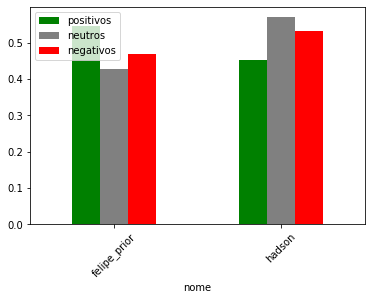

In [19]:
qtds_df.plot.bar(rot=45, color=['green', 'gray', 'red'])

# Tweets por dia

In [20]:
names = list(candidates.keys())
tweets_by_day_df = get_tweets_by_day(candidates[names[0]], names[0])
for name in names[1:]:
    current = get_tweets_by_day(candidates[name], name)
    tweets_by_day_df = tweets_by_day_df.append(current)

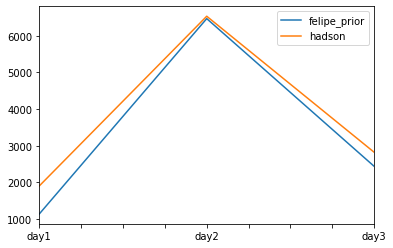

In [21]:
tweets_by_day_df.transpose().plot()

# Seleção de atributos

In [22]:
atributes_df = qtds_df_copy.join(pcts_df, rsuffix="_individual_pct")
atributes_df = atributes_df.join(qtds_df, rsuffix="_global_pct")
atributes_df = atributes_df.join(tweets_by_day_df)

In [23]:
participantes_info = get_participantes_info()
paredoes_info = get_paredoes_info()

In [24]:
followers = [participantes_info[participante]["seguidores"] for participante in atributes_df.index]


In [25]:
likes = [get_likes_count(candidates[participante]) for participante in atributes_df.index]

In [26]:
retweets = [get_retweets_count(candidates[participante]) for participante in atributes_df.index]

In [27]:
paredao_info = paredoes_info[PAREDAO]["candidatos"]
results_info = {candidate["nome"]: candidate["porcentagem"]/100 for candidate in paredao_info}
rejection = [results_info[participante] for participante in atributes_df.index]

In [28]:
atributes_df["likes"] = likes
atributes_df["retweets"] = retweets
atributes_df["seguidores"] = followers
atributes_df["rejeicao"] = rejection

In [29]:
atributes_df

,positivos,neutros,negativos,positivos_individual_pct,neutros_individual_pct,negativos_individual_pct,positivos_global_pct,neutros_global_pct,negativos_global_pct,day1,day2,day3,likes,retweets,seguidores,rejeicao
nome,,,,,,,,,,,,,,,,
felipe_prior,2824,3707,3514,0.281135,0.369039,0.349826,0.54644,0.429299,0.468471,1138,6469,2438,434766,81439,204031,0.2029
hadson,2344,4928,3987,0.208189,0.437694,0.354117,0.45356,0.570701,0.531529,1903,6534,2822,224448,41345,10207,0.7971


In [30]:
atributes_df.to_csv("data/{}/paredao_atributes.csv".format(PAREDAO))